In [1]:
# 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import DecomposeResult
from finta import TA
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Data
* The data for time series comes from kaggle, and it has five stocks:
    * AAPL -> apple
    * AMZN -> amazon
    * GOOGL -> google
    * MSFT -> microsoft
    * TSLA -> tesla
* It's through a span of 10 years, from 2010 to 2020 (only using from 2015 and 2020 to keep coherence with the sentiment part since we only have from 2015 to 2020 for the sentiment analysis)

In [2]:
df = pd.read_csv("../data/CompanyValues.csv")
df = df.rename(columns={"day_date":"date","close_value":"close", "open_value":"open", "high_value":"high", "low_value":"low"})
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
df = df.sort_values(by=["date"])
df = df[df.date >= "2015-01-01"]
df.tail()

,ticker_symbol,date,close,volume,open,high,low
14463,TSLA,2020-05-29,835.00,11812490,808.75,835.00,804.2100
9255,GOOG,2020-05-29,1428.92,1838059,1416.94,1432.57,1413.3500
11378,MSFT,2020-05-29,183.25,42146720,182.73,184.27,180.4100
3085,AMZN,2020-05-29,2442.37,3529329,2415.94,2442.37,2398.1973
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.4700


In [3]:
px.line(df, x="date", y="close", color="ticker_symbol")

## Get individual stocks

In [4]:
def stock_dataframe(ticker: str, data: pd.DataFrame) -> pd.DataFrame:
    
    return data.loc[data["ticker_symbol"].isin(["AAPL"])]\
        [["date", "close", "volume", "open", "high", "low"]]

In [6]:
aapl_df = stock_dataframe(ticker="AAPL", data=df).reset_index(drop=True)
aapl_df.tail()

,date,close,volume,open,high,low
1924,2020-05-22,318.89,20450750,315.77,319.23,315.35
1925,2020-05-26,316.73,31380450,323.50,324.24,316.50
1926,2020-05-27,318.11,28236270,316.14,318.71,313.09
1927,2020-05-28,318.25,33449100,316.77,323.44,315.63
1928,2020-05-29,317.94,38399530,319.25,321.15,316.47


In [4]:
aapl = pd.read_csv("../data/CompanyValues.csv")
aapl = aapl.loc[aapl["ticker_symbol"].isin(["AAPL"])]\
    [["day_date", "close_value", "volume", "open_value", "high_value", "low_value"]]
aapl = aapl.rename(columns={"day_date":"date","close_value":"close", "open_value":"open", "high_value":"high", "low_value":"low"})
aapl["date"] = pd.to_datetime(aapl["date"], format="%Y-%m-%d")
aapl = aapl.sort_values(by=["date"])
aapl = aapl.set_index("date")
aapl

,close,volume,open,high,low
date,,,,,
2010-06-01,37.2614,218455576,37.0986,37.9914,36.9943
2010-06-02,37.7071,171594061,37.7914,37.8286,37.1907
2010-06-03,37.5886,162341809,37.8828,37.9357,37.2014
2010-06-04,36.5664,189045767,36.8871,37.4143,36.3757
2010-06-07,35.8486,221253336,36.8986,37.0214,35.7928
...,...,...,...,...,...
2020-05-22,318.8900,20450750,315.7700,319.2300,315.3500
2020-05-26,316.7300,31380450,323.5000,324.2400,316.5000
2020-05-27,318.1100,28236270,316.1400,318.7100,313.0900


In [5]:
aapl = aapl[aapl.index >= "2015-01-01"]

# Technical Indicators

* The technical Indicators used were:
    * MACD -> Moving average convergence
    * SMA -> Simple moving average
    * EMA -> Exponential moving average
    * WMA -> Weighted moving average
    * RSI -> Relative strength Index


In [87]:
aapl["SMA"] = TA.SMA(aapl, 50)
aapl["EMA"] = TA.EMA(aapl, 200)
aapl["WMA"] = TA.WMA(aapl)
aapl["RSI"] = TA.RSI(aapl)
aapl[["MACD", "SIGNAL"]] = TA.MACD(aapl)
aapl['MACD_diff'] = aapl['MACD'].sub(aapl['SIGNAL'], axis = 0)

/var/folders/r4/wcp88kdx6r9g4_1wtlb27h2r0000gn/T/ipykernel_30302/1828207526.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r4/wcp88kdx6r9g4_1wtlb27h2r0000gn/T/ipykernel_30302/1828207526.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r4/wcp88kdx6r9g4_1wtlb27h2r0000gn/T/ipykernel_30302/1828207526.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [106]:
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, row_heights=[.5, .1, .3, .1])

fig.add_trace(go.Candlestick(
     x=aapl.index,
     open=aapl['open'],
     high=aapl['high'],
     low=aapl['low'], 
     close=aapl['close'],
     showlegend=False,
     legendgroup="1"
     ), row=1, col=1
)

fig.add_trace(go.Scatter(
     x=aapl.index,
     y=aapl.SMA,
     opacity=0.7,
     line=dict(color='green', width=2),
     name="50-day SMA",
     legendgroup="1"
     ), row=1, col=1
)

fig.add_trace(go.Scatter(
     x=aapl.index,
     y=aapl.EMA,
     opacity=0.7,
     line=dict(color='orange', width=2),
     name="200-day EMA",
     legendgroup="1"
     ), row=1, col=1
)

fig.add_trace(go.Bar(
     x=aapl.index,
     y=aapl['volume'],
     showlegend=False,
     marker_color="blue",
     legendgroup="2"
     ), row=2, col=1
)

fig.add_trace(go.Bar(
     x=aapl.index,
     y=aapl.MACD_diff,
     name="Difference",
     legendgroup="3"
     ), row=3, col=1
)
fig.add_trace(go.Scatter(
     x=aapl.index,
     y=aapl.MACD,
     name="MACD",
     line=dict(color='blue', width=1),
     legendgroup="3"
     ), row=3, col=1
)
fig.add_trace(go.Scatter(
     x=aapl.index,
     y=aapl.SIGNAL,
     line=dict(color='black', width=1),
     name="Signal",
     legendgroup="3"
     ), row=3, col=1
)

fig.add_trace(go.Scatter(
     x=aapl.index,
     y=aapl.RSI,
     showlegend=False,
     line=dict(color='gray', width=1),
     legendgroup="4"
     ), row=4, col=1
)
fig.add_trace(go.Scatter(
     x=aapl.index,
     y=[30] * len(aapl),
     line=dict(color='black', width=.5, dash="dot"),
     showlegend=False
     ), row=4, col=1
)
fig.add_trace(go.Scatter(
     x=aapl.index,
     y=[50] * len(aapl),
     line=dict(color='red', width=.5, dash="dot"),
     showlegend=False
     ), row=4, col=1
)
fig.add_trace(go.Scatter(
     x=aapl.index,
     y=[70] * len(aapl),
     line=dict(color='black', width=.5, dash="dot"),
     showlegend=False
     ), row=4, col=1
)

fig.update_layout(
     xaxis_rangeslider_visible=False,
     height=600, 
     width=1000, 
     title_text="Life Expectancy in the Americas", 
     yaxis1_title = 'Candle Stick',
     yaxis2_title = 'Volume',
     yaxis3_title = 'MACD',
     yaxis4_title = 'RSI',
     legend_tracegroupgap = 250
)

fig.update_layout(title="AAPL")
fig.show()

## Bollinger Bands (BBANDS)

In [112]:
aapl[["BB_upper", "BB_mid", "BB_low"]] = TA.BBANDS(aapl, period=30)

/var/folders/r4/wcp88kdx6r9g4_1wtlb27h2r0000gn/T/ipykernel_30302/4095793694.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [121]:
fig = go.Figure()
fig.add_trace(go.Candlestick(
     x=aapl.index,
     open=aapl['open'],
     high=aapl['high'],
     low=aapl['low'], 
     close=aapl['close'],
     showlegend=False,
     legendgroup="1")
)
fig.add_trace(
    go.Scatter(
        x=aapl.index,
        y=aapl.BB_low,
        line=dict(color='black', width=.5, dash="dot"),
        name="Bollinger Lower Band"
    )
)
fig.add_trace(
    go.Scatter(
        x=aapl.index,
        y=aapl.BB_mid,
        line=dict(color='black', width=1),
        name="Bollinger Middle Band"
    )
)
fig.add_trace(
    go.Scatter(
        x=aapl.index,
        y=aapl.BB_upper,
        line=dict(color='black', width=.5, dash="dot"),
        name="Bollinger Upper Band"
    )
)
fig.update_layout(xaxis_rangeslider_visible=False,width=1000, 
     title_text="Bollinger Bands", 
     yaxis1_title = 'Price',)
fig.show()

In [5]:
aapl

,close,volume,open,high,low,SMA,RSI,OBV
date,,,,,,,,
2010-06-01,37.2614,218455576,37.0986,37.9914,36.9943,NaN,NaN,NaN
2010-06-02,37.7071,171594061,37.7914,37.8286,37.1907,NaN,100.000000,171594061.0
2010-06-03,37.5886,162341809,37.8828,37.9357,37.2014,NaN,77.740806,9252252.0
2010-06-04,36.5664,189045767,36.8871,37.4143,36.3757,NaN,25.340775,-179793515.0
2010-06-07,35.8486,221253336,36.8986,37.0214,35.7928,NaN,16.785042,-401046851.0
...,...,...,...,...,...,...,...,...
2020-05-22,318.8900,20450750,315.7700,319.2300,315.3500,312.355000,65.836821,864917712.0
2020-05-26,316.7300,31380450,323.5000,324.2400,316.5000,313.437500,63.580844,833537262.0
2020-05-27,318.1100,28236270,316.1400,318.7100,313.0900,314.102500,64.419696,861773532.0


In [122]:
aapl.describe()

,close,volume,open,high,low,SMA,RSI,OBV,MACD,SIGNAL,MACD_diff,EMA,WMA,BB_upper,BB_mid,BB_low
count,1929.000000,1.929000e+03,1929.000000,1929.000000,1929.000000,1880.000000,1928.000000,1.359000e+03,1929.000000,1929.000000,1929.000000,1929.000000,1921.000000,1900.000000,1900.000000,1900.000000
mean,161.692522,3.640016e+07,161.618776,163.127611,160.159106,160.570624,55.671583,7.246450e+07,0.677677,0.657073,0.020604,153.681672,161.622476,170.599838,160.965842,151.331846
std,53.392632,1.795748e+07,53.185439,53.952874,52.657228,50.771765,16.059368,4.136008e+08,3.202934,3.018407,0.881371,43.513543,53.029870,57.057323,51.652436,46.957436
min,90.340000,1.136205e+07,90.000000,91.670000,89.470000,96.013200,0.000000,-8.958333e+08,-18.721304,-15.292268,-6.301312,100.746331,91.272889,98.191932,94.168333,84.282578
25%,116.290000,2.414324e+07,116.450000,117.200000,115.510000,115.705375,44.026677,-2.229991e+08,-0.610803,-0.546864,-0.380051,116.995021,116.473778,121.961766,116.065333,110.283516
50%,154.120000,3.213036e+07,154.200000,155.450000,153.000000,156.424500,56.809736,1.339167e+08,0.858372,0.776798,0.028423,144.270269,154.126000,161.312952,154.522000,145.583531
75%,191.050000,4.375181e+07,191.170000,192.140000,189.770000,190.401350,67.118618,3.239579e+08,2.323710,2.260059,0.414738,186.377270,191.267778,202.994883,189.655833,181.634513
max,327.200000,1.618825e+08,324.740000,327.850000,323.350000,307.853000,93.001156,9.773675e+08,10.732160,10.162531,6.152293,272.728270,323.484889,348.395675,317.981000,307.109229


In [14]:
aapl["close_pct"] = aapl.close_value.pct_change().dropna().asfreq("D") * 100

# Seasonality

In [6]:
stl = STL(aapl["close"], seasonal=13)
res = stl.fit()

ValueError: Unable to determine period from endog

In [7]:
co2 = [
    315.58,
    316.39,
    316.79,
    317.82,
    318.39,
    318.22,
    316.68,
    315.01,
    314.02,
    313.55,
    315.02,
    315.75,
    316.52,
    317.10,
    317.79,
    319.22,
    320.08,
    319.70,
    318.27,
    315.99,
    314.24,
    314.05,
    315.05,
    316.23,
    316.92,
    317.76,
    318.54,
    319.49,
    320.64,
    319.85,
    318.70,
    316.96,
    315.17,
    315.47,
    316.19,
    317.17,
    318.12,
    318.72,
    319.79,
    320.68,
    321.28,
    320.89,
    319.79,
    317.56,
    316.46,
    315.59,
    316.85,
    317.87,
    318.87,
    319.25,
    320.13,
    321.49,
    322.34,
    321.62,
    319.85,
    317.87,
    316.36,
    316.24,
    317.13,
    318.46,
    319.57,
    320.23,
    320.89,
    321.54,
    322.20,
    321.90,
    320.42,
    318.60,
    316.73,
    317.15,
    317.94,
    318.91,
    319.73,
    320.78,
    321.23,
    322.49,
    322.59,
    322.35,
    321.61,
    319.24,
    318.23,
    317.76,
    319.36,
    319.50,
    320.35,
    321.40,
    322.22,
    323.45,
    323.80,
    323.50,
    322.16,
    320.09,
    318.26,
    317.66,
    319.47,
    320.70,
    322.06,
    322.23,
    322.78,
    324.10,
    324.63,
    323.79,
    322.34,
    320.73,
    319.00,
    318.99,
    320.41,
    321.68,
    322.30,
    322.89,
    323.59,
    324.65,
    325.30,
    325.15,
    323.88,
    321.80,
    319.99,
    319.86,
    320.88,
    322.36,
    323.59,
    324.23,
    325.34,
    326.33,
    327.03,
    326.24,
    325.39,
    323.16,
    321.87,
    321.31,
    322.34,
    323.74,
    324.61,
    325.58,
    326.55,
    327.81,
    327.82,
    327.53,
    326.29,
    324.66,
    323.12,
    323.09,
    324.01,
    325.10,
    326.12,
    326.62,
    327.16,
    327.94,
    329.15,
    328.79,
    327.53,
    325.65,
    323.60,
    323.78,
    325.13,
    326.26,
    326.93,
    327.84,
    327.96,
    329.93,
    330.25,
    329.24,
    328.13,
    326.42,
    324.97,
    325.29,
    326.56,
    327.73,
    328.73,
    329.70,
    330.46,
    331.70,
    332.66,
    332.22,
    331.02,
    329.39,
    327.58,
    327.27,
    328.30,
    328.81,
    329.44,
    330.89,
    331.62,
    332.85,
    333.29,
    332.44,
    331.35,
    329.58,
    327.58,
    327.55,
    328.56,
    329.73,
    330.45,
    330.98,
    331.63,
    332.88,
    333.63,
    333.53,
    331.90,
    330.08,
    328.59,
    328.31,
    329.44,
    330.64,
    331.62,
    332.45,
    333.36,
    334.46,
    334.84,
    334.29,
    333.04,
    330.88,
    329.23,
    328.83,
    330.18,
    331.50,
    332.80,
    333.22,
    334.54,
    335.82,
    336.45,
    335.97,
    334.65,
    332.40,
    331.28,
    330.73,
    332.05,
    333.54,
    334.65,
    335.06,
    336.32,
    337.39,
    337.66,
    337.56,
    336.24,
    334.39,
    332.43,
    332.22,
    333.61,
    334.78,
    335.88,
    336.43,
    337.61,
    338.53,
    339.06,
    338.92,
    337.39,
    335.72,
    333.64,
    333.65,
    335.07,
    336.53,
    337.82,
    338.19,
    339.89,
    340.56,
    341.22,
    340.92,
    339.26,
    337.27,
    335.66,
    335.54,
    336.71,
    337.79,
    338.79,
    340.06,
    340.93,
    342.02,
    342.65,
    341.80,
    340.01,
    337.94,
    336.17,
    336.28,
    337.76,
    339.05,
    340.18,
    341.04,
    342.16,
    343.01,
    343.64,
    342.91,
    341.72,
    339.52,
    337.75,
    337.68,
    339.14,
    340.37,
    341.32,
    342.45,
    343.05,
    344.91,
    345.77,
    345.30,
    343.98,
    342.41,
    339.89,
    340.03,
    341.19,
    342.87,
    343.74,
    344.55,
    345.28,
    347.00,
    347.37,
    346.74,
    345.36,
    343.19,
    340.97,
    341.20,
    342.76,
    343.96,
    344.82,
    345.82,
    347.24,
    348.09,
    348.66,
    347.90,
    346.27,
    344.21,
    342.88,
    342.58,
    343.99,
    345.31,
    345.98,
    346.72,
    347.63,
    349.24,
    349.83,
    349.10,
    347.52,
    345.43,
    344.48,
    343.89,
    345.29,
    346.54,
    347.66,
    348.07,
    349.12,
    350.55,
    351.34,
    350.80,
    349.10,
    347.54,
    346.20,
    346.20,
    347.44,
    348.67,
]
co2 = pd.Series(
    co2, index=pd.date_range("1-1-1959", periods=len(co2), freq="M"), name="CO2"
)
co2.describe()

count    348.000000
mean     330.123879
std       10.059747
min      313.550000
25%      321.302500
50%      328.820000
75%      338.002500
max      351.340000
Name: CO2, dtype: float64

In [9]:
co2

1959-01-31    315.58
1959-02-28    316.39
1959-03-31    316.79
1959-04-30    317.82
1959-05-31    318.39
               ...  
1987-08-31    347.54
1987-09-30    346.20
1987-10-31    346.20
1987-11-30    347.44
1987-12-31    348.67
Freq: M, Name: CO2, Length: 348, dtype: float64

In [12]:
stl_data = aapl["close"].values
stl_data

array([110.38, 109.33, 109.33, ..., 318.11, 318.25, 317.94])

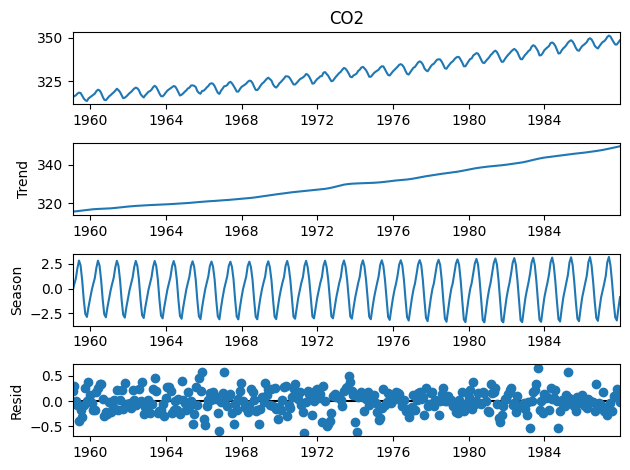

In [15]:
stl = STL(co2, seasonal=13)
res = stl.fit()
fig = res.plot()

In [14]:
from statsmodels.tsa.forecasting.theta import ThetaModel

In [15]:
aapl

,close_value,volume,open_value,high_value,low_value,close_pct
day_date,,,,,,
2010-06-01,37.2614,218455576,37.0986,37.9914,36.9943,NaN
2010-06-02,37.7071,171594061,37.7914,37.8286,37.1907,1.196144
2010-06-03,37.5886,162341809,37.8828,37.9357,37.2014,-0.314264
2010-06-04,36.5664,189045767,36.8871,37.4143,36.3757,-2.719442
2010-06-07,35.8486,221253336,36.8986,37.0214,35.7928,-1.963004
...,...,...,...,...,...,...
2020-05-22,318.8900,20450750,315.7700,319.2300,315.3500,0.643838
2020-05-26,316.7300,31380450,323.5000,324.2400,316.5000,-0.677350
2020-05-27,318.1100,28236270,316.1400,318.7100,313.0900,0.435702


In [16]:
aapl.columns

Index(['close_value', 'volume', 'open_value', 'high_value', 'low_value',
       'close_pct'],
      dtype='object')

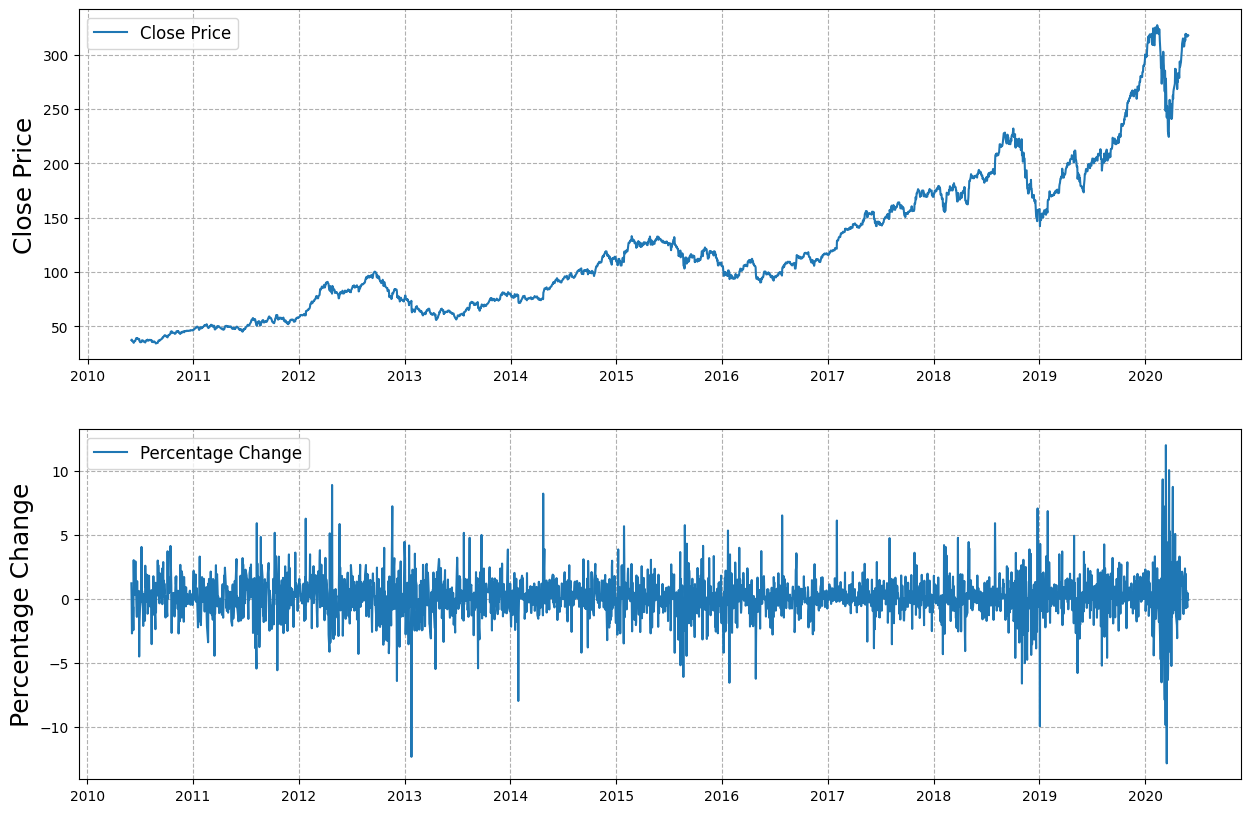

In [17]:
fig = plt.figure(figsize=(15,10))
# st = fig.suptitle(f"{ticker} Close Price")
# st.set_y(0.92)

ax1 = fig.add_subplot(211)
ax1.plot(aapl['close_value'], label=f'Close Price')
ax1.set_ylabel('Close Price', fontsize=18)
ax1.legend(loc="upper left", fontsize=12)
ax1.grid(linestyle="--")

ax2 = fig.add_subplot(212)
ax2.plot(aapl['close_pct'], label=f'Percentage Change')
ax2.set_ylabel('Percentage Change', fontsize=18)
ax2.legend(loc="upper left", fontsize=12)
ax2.grid(linestyle="--")

In [18]:
mod = AutoReg(aapl.close_pct.dropna(), 3, old_names=False)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:              close_pct   No. Observations:                 3084
Model:                     AutoReg(3)   Log Likelihood               -5735.578
Method:               Conditional MLE   S.D. of innovations              1.557
Date:                Sat, 14 Jan 2023   AIC                          11481.156
Time:                        13:53:16   BIC                          11511.321
Sample:                             3   HQIC                         11491.992
                                 3084                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0843      0.028      2.993      0.003       0.029       0.140
close_pct.L1    -0.0587      0.018     -3.262      0.001      -0.094      -0.023
close_pct.L2     0.0241      0.018      1.33

/opt/miniconda3/envs/adc_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [19]:
res = mod.fit("HC0")
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:              close_pct   No. Observations:                 3084
Model:                     AutoReg(3)   Log Likelihood               -5735.578
Method:               Conditional MLE   S.D. of innovations              1.557
Date:                Sat, 14 Jan 2023   AIC                          11481.156
Time:                        13:53:16   BIC                          11511.321
Sample:                             3   HQIC                         11491.992
                                 3084                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0843      0.029      2.878      0.004       0.027       0.142
close_pct.L1    -0.0587      0.034     -1.746      0.081      -0.125       0.007
close_pct.L2     0.0241      0.031      0.78

In [20]:
sel = ar_select_order(aapl.close_pct.dropna(), 13, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:              close_pct   No. Observations:                 3084
Model:                     AutoReg(1)   Log Likelihood               -5741.014
Method:               Conditional MLE   S.D. of innovations              1.558
Date:                Sat, 14 Jan 2023   AIC                          11488.028
Time:                        13:53:18   BIC                          11506.129
Sample:                             1   HQIC                         11494.530
                                 3084                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0863      0.028      3.071      0.002       0.031       0.141
close_pct.L1    -0.0598      0.018     -3.325      0.001      -0.095      -0.025
                                    Roots   

/opt/miniconda3/envs/adc_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/adc_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


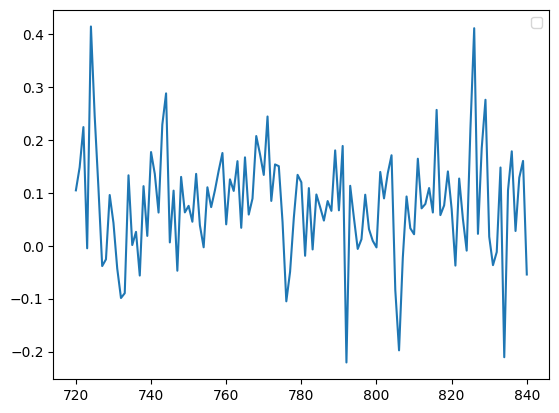

In [21]:
fig = res.plot_predict(720, 840)

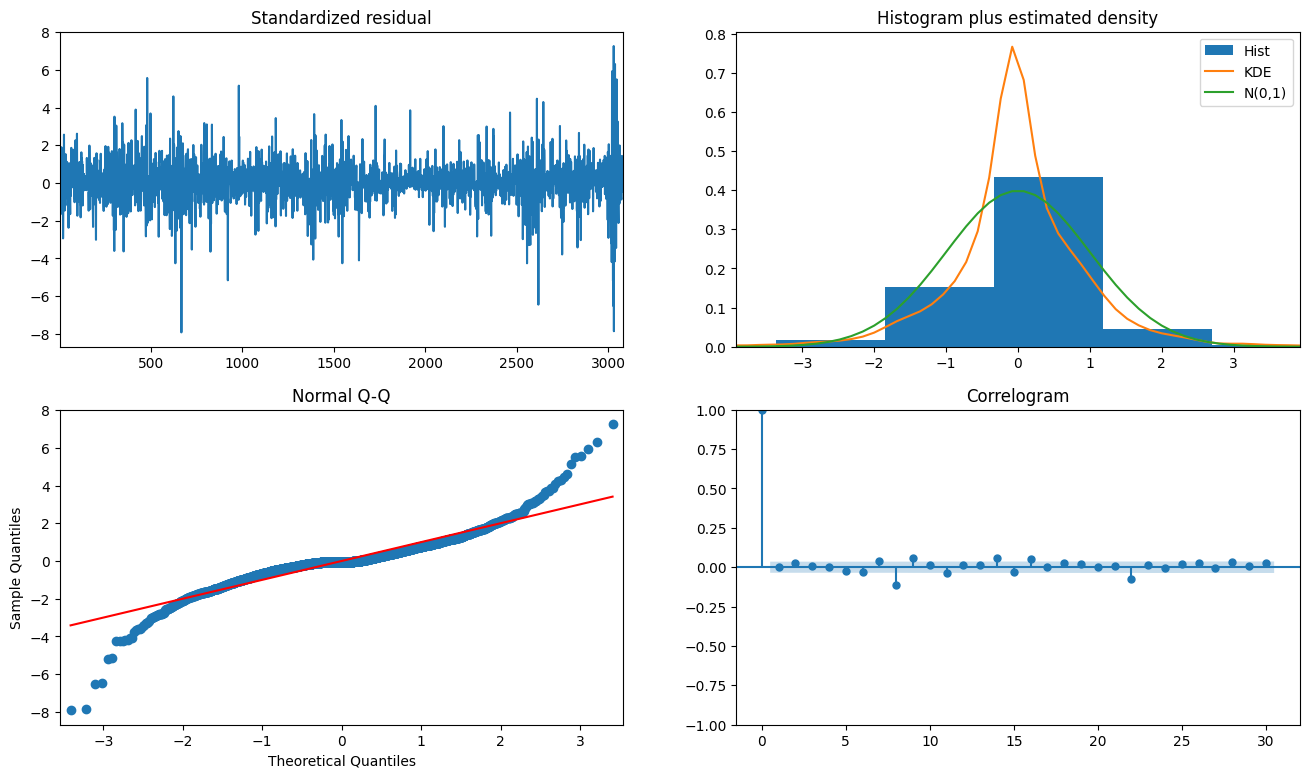

In [22]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=30)


In [23]:
sel = ar_select_order(aapl.close_pct.dropna(), 2, seasonal=True, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

/opt/miniconda3/envs/adc_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ValueError: freq cannot be inferred from endog and model includes seasonal terms.  The number of periods must be explicitly set when the endog's index does not contain a frequency.

# Forecasting

In [16]:
from statsmodels.tsa.forecasting.theta import ThetaModel 

In [27]:
aapl = aapl.asfreq("d")
closing_price = aapl.close

In [28]:
closing_price

date
2015-01-01    110.38
2015-01-02    109.33
2015-01-03    109.33
2015-01-04    109.33
2015-01-05    106.25
               ...  
2020-05-25       NaN
2020-05-26    316.73
2020-05-27    318.11
2020-05-28    318.25
2020-05-29    317.94
Freq: D, Name: close, Length: 1976, dtype: float64

In [29]:
tm = ThetaModel(closing_price)

In [30]:
res = tm.fit()
print(res.summary())

                              ThetaModel Results                              
Dep. Variable:                  close   No. Observations:                 1976
Method:                       OLS/SES   Deseasonalized:                   True
Date:                Mon, 16 Jan 2023   Deseas. Method:               Additive
Time:                        21:19:39   Period:                              7
Sample:                    01-01-2015                                         
                         - 05-29-2020                                         
  Parameter Estimates   
          Parameters    
------------------------
b0                   nan
alpha 0.8724951729107563
------------------------


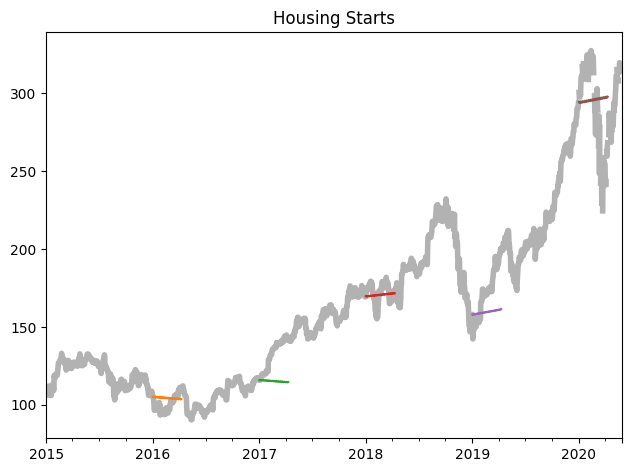

In [33]:
forecasts = {"housing": closing_price}
for year in range(2015, 2020, 1):
    sub = closing_price[: str(year)]
    res = ThetaModel(sub).fit()
    fcast = res.forecast(100)
    forecasts[str(year)] = fcast
forecasts = pd.DataFrame(forecasts)
ax = forecasts["1995":].plot(legend=False)
children = ax.get_children()
children[0].set_linewidth(4)
children[0].set_alpha(0.3)
children[0].set_color("#000000")
ax.set_title("Housing Starts")
plt.tight_layout(pad=1.0)

In [34]:
import numpy as np
tm = ThetaModel(np.log(closing_price), method="additive")
res = tm.fit(use_mle=True)
print(res.summary())

                              ThetaModel Results                              
Dep. Variable:                  close   No. Observations:                 1976
Method:                           MLE   Deseasonalized:                   True
Date:                Mon, 16 Jan 2023   Deseas. Method:               Additive
Time:                        21:23:09   Period:                              7
Sample:                    01-01-2015                                         
                         - 05-29-2020                                         
    Parameter Estimates    
            Parameters     
---------------------------
b0    0.0005322779973750191
alpha    0.9300874650744583
---------------------------


In [35]:
res.forecast_components(12)

,trend,ses,seasonal
2020-05-30,0.000572,5.761967,0.0
2020-05-31,0.001105,5.761967,0.0
2020-06-01,0.001637,5.761967,0.0
2020-06-02,0.002169,5.761967,0.0
2020-06-03,0.002701,5.761967,0.0
2020-06-04,0.003234,5.761967,0.0
2020-06-05,0.003766,5.761967,0.0
2020-06-06,0.004298,5.761967,0.0
2020-06-07,0.004831,5.761967,0.0
2020-06-08,0.005363,5.761967,0.0


In [37]:
mod = ThetaModel(np.log(closing_price))
res = mod.fit()
print(res.summary())

                              ThetaModel Results                              
Dep. Variable:                  close   No. Observations:                 1976
Method:                       OLS/SES   Deseasonalized:                   True
Date:                Mon, 16 Jan 2023   Deseas. Method:               Additive
Time:                        21:24:31   Period:                              7
Sample:                    01-01-2015                                         
                         - 05-29-2020                                         
  Parameter Estimates   
          Parameters    
------------------------
b0                   nan
alpha 0.9319794342648391
------------------------


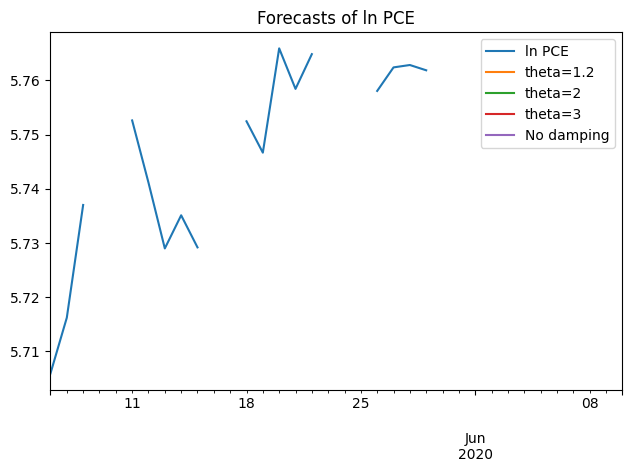

In [38]:
forecasts = pd.DataFrame(
    {
        "ln PCE": np.log(closing_price),
        "theta=1.2": res.forecast(12, theta=1.2),
        "theta=2": res.forecast(12),
        "theta=3": res.forecast(12, theta=3),
        "No damping": res.forecast(12, theta=np.inf),
    }
)
_ = forecasts.tail(36).plot()
plt.title("Forecasts of ln PCE")
plt.tight_layout(pad=1.0)